In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tempfile, sys, os
sys.path.insert(0, os.path.abspath('..'))
from deepexplain.tensorflow import DeepExplain
from explain_helper import explain_model, load_image

/Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ptien/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ptien/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ptien/.matplotlib/matplotlibrc", line #4
  (fname, cnt))
/Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ptien/.matplotlib/matplotlibrc", line #5
  (fname, cnt))
/Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ptien/.matplotlib/matplotlibrc", line #6
  (fname, cnt))
/Users/ptien/miniconda/envs/py

In [2]:
%matplotlib inline
import pandas as pd
import PIL
import tensorflow as tf
import numpy as np

In [3]:
image_path = "/Users/ptien/tfds-download/apple2orange/testA/"
base_image_path = "/Users/ptien/tfds-download/apple2orange/experiment2-500000/generated_y/"
file_name = ["n07740461_10011.jpg", "n07740461_240.jpg", "n07740461_14960.jpg", 
             "n07740461_2770.jpg", "n07740461_14600.jpg", "n07740461_14531.jpg", "n07740461_14300.jpg"]
model_path = "/Users/ptien/DeepLearning/research/gan/apple2orange.h5"
num_class = 2
labels = [0]*len(file_name) # [0,0,0,0,0,0]
explain_types = ["intgrad", "intgrad_base", "deeplift", "deeplift_base"]
imag, y_label, base_imag = load_image(image_path, base_image_path, file_name, labels, num_class)
output = explain_model(model_path, imag, y_label, num_class, base_imag, explain_types)

W0402 17:13:24.792954 140736803337152 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0402 17:13:24.793864 140736803337152 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0402 17:13:24.828954 140736803337152 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/re

process intgrad
process intgrad_base
process deeplift


W0402 17:31:00.145567 140736803337152 deprecation.py:323] From /Users/ptien/DeepLearning/DeepExplain/deepexplain/tensorflow/methods.py:372: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


process deeplift_base


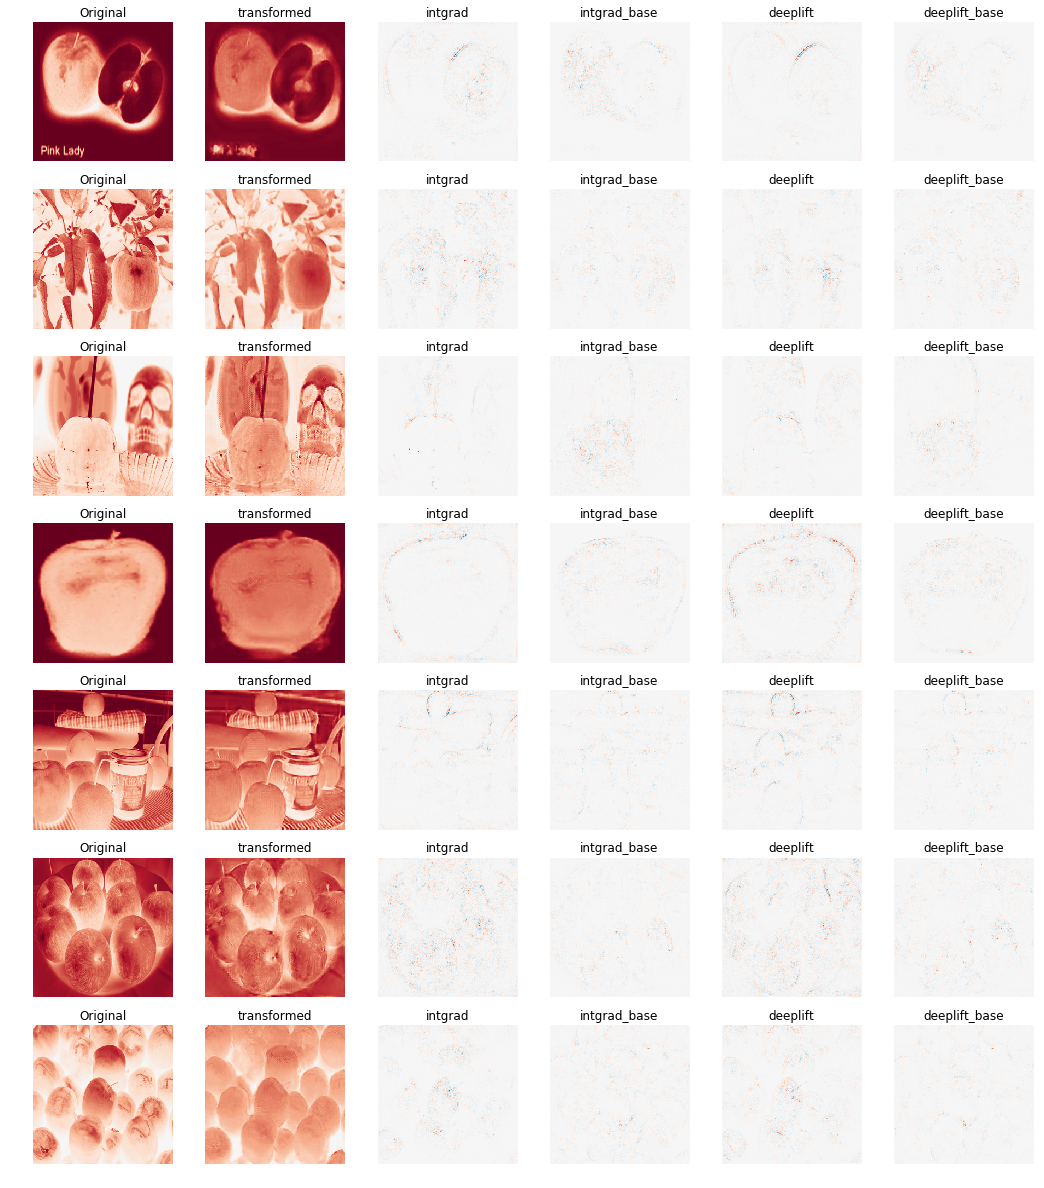

In [4]:
from utils import plot, plt

nrows = len(file_name)
ncols = 2 + len(explain_types) # 6
# n_cols = ncols # 5
# n_rows = nrows # 2
xs = imag
attributions_ig = output["intgrad"]
attributions_ig_base_line = output["intgrad_base"]
attributions_dl = output["deeplift"]
attributions_dl_base_line = output["deeplift_base"]
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows))
for i in range(nrows):
    a1 = attributions_ig[i]
    a2 = attributions_ig_base_line[i]
    a3 = attributions_dl[i]
    a4 = attributions_dl_base_line[i]
    plot(xs[i], axis=axes[i,0]).set_title('Original')
    plot(base_imag[i], axis=axes[i,1]).set_title('transformed')
    plot(a1, axis=axes[i,2]).set_title('intgrad')
    plot(a2, axis=axes[i,3]).set_title('intgrad_base')
    plot(a3, axis=axes[i,4]).set_title('deeplift')
    plot(a4, axis=axes[i, 5]).set_title('deeplift_base')

In [3]:
image_path = "/Users/ptien/tfds-download/horse2zebra/testA/"
base_image_path = "/Users/ptien/tfds-download/horse2zebra/experiment-500000/generated_y/"
file_name = ["n02381460_120.jpg", "n02381460_7500.jpg", "n02381460_4410.jpg"]
model_path = "/Users/ptien/tfds-download/models_ckpts/tfgan_logdir/h2z/classification/model_ckpt/modelh5/horse2zebra_keras.h5"
num_class = 2
labels = [0]* len(file_name)
explain_types = ["intgrad", "intgrad_base", "deeplift", "deeplift_base"]
imag, y_label, base_imag = load_image(image_path, base_image_path, file_name, labels, num_class)
output = explain_model(model_path, imag, y_label, num_class, base_imag, explain_types)

W0410 17:18:00.615433 140735777022912 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0410 17:18:00.616694 140735777022912 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0410 17:18:00.676254 140735777022912 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/re

process intgrad
process intgrad_base
process deeplift


W0410 17:26:48.085771 140735777022912 deprecation.py:323] From /Users/ptien/DeepLearning/DeepExplain/deepexplain/tensorflow/methods.py:372: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


process deeplift_base


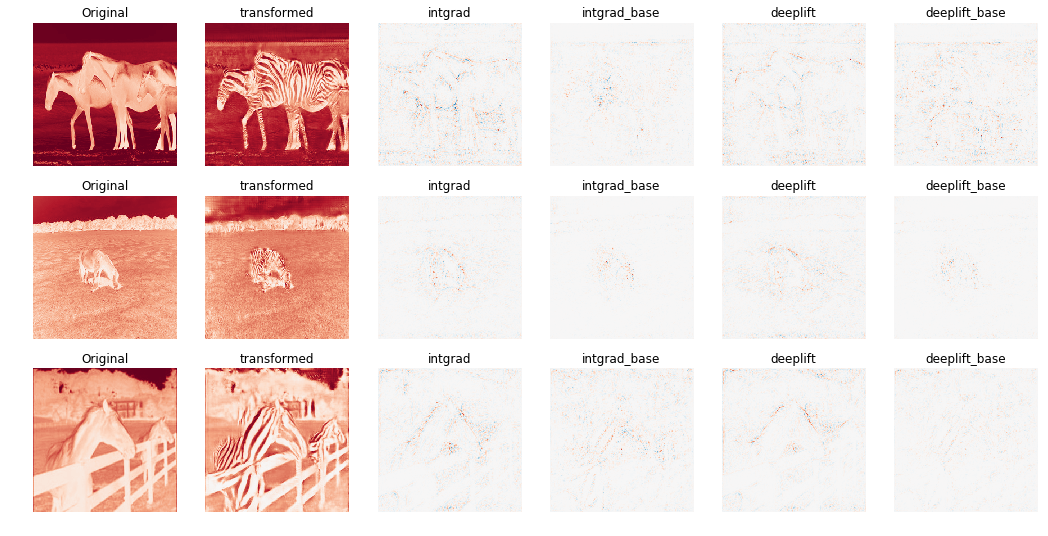

In [4]:
from utils import plot, plt

nrows = len(file_name)
ncols = len(explain_types)  + 2 # 6
n_cols = ncols # 5
n_rows = nrows # 2
xs = imag
attributions_ig = output["intgrad"]
attributions_ig_base_line = output["intgrad_base"]
attributions_dl = output["deeplift"]
attributions_dl_base_line = output["deeplift_base"]
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*n_cols, 3*n_rows))
for i in range(nrows):
    a1 = attributions_ig[i]
    a2 = attributions_ig_base_line[i]
    a3 = attributions_dl[i]
    a4 = attributions_dl_base_line[i]
    plot(xs[i], axis=axes[i,0]).set_title('Original')
    plot(base_imag[i], axis=axes[i,1]).set_title('transformed')
    plot(a1, axis=axes[i,2]).set_title('intgrad')
    plot(a2, axis=axes[i,3]).set_title('intgrad_base')
    plot(a3, axis=axes[i,4]).set_title('deeplift')
    plot(a4, axis=axes[i, 5]).set_title('deeplift_base')

In [5]:
# count how many pixels corresponding to singal. (num_signal_pixel)
# diff_imag = (image - transformed image from GAN)/2
# sum_imag = (image + transformed image from GAN)/2
# assume imag can be represented in the 256*256*3 dimension vector space.
# num_signal_pixel = (np.multiply(dff_image, sum_image) > 0.0).sum()

# assume GAN succeed transforming the target features.
# we want to extract the part of pixel corresponding to background and use that as a baseline input in DeepExplain.
# how:
# sol 1:
# the diff_imag (image - transformed image from GAN) can be sorted ascedningly.
# the real background corresponds to very small diff.
# thus, we use top-num_signal_pixel largest element as a threshold to distinguish real background and singal.
# use this threshold to construct the baseline.
# a) if x < threshold, leave it as the same.
# b) else, make it zero.
# thus, when we use this image as baseline in the IG, the real background will be canceled out. 
# And the baseline of the feature will be zero.

In [3]:
from copy import deepcopy

def build_base_line_v0(imag_input, gan_imag_input):
    """ not finished yet!!!"""
    assert imag_input.shape == gan_imag_input.shape
    assert len(imag_input.shape) == 4, "Expect 4-dim, (num_imag, H, W, C)"
    num_imags = imag_input.shape[0]
    
    for i in range(num_imags):
        imag = imag_input[i]
        gan_imag = gan_imag_input[i]
        dff_image = (imag - gan_imag)/2
        sum_image = (imag + gan_imag)/2
        num_signal_pixel = (np.multiply(dff_image, sum_image) > 0.0).sum()

        # consider square. it make sure the smaller become smaller.
        # use mask to obtain real baseline.
        square_diff_image = abs(dff_image)**2
        a1 = square_diff_image.reshape(-1)
        a1 = np.array(sorted(a1))
        num = len(a1)
        a1_shift = a1[:num-1]
        arr_diff = np.array(a1[1:]) - np.array(a1_shift)
        threshold_indexs = arr_diff.argsort()[-num_signal_pixel:][::-1]
        threshold_index = threshold_indexs[-1]
        print("threshold indexs: {x} and pick the last one {y}.".format(x=threshold_indexs,y=threshold_index))
        threshold = a1[threshold_index]
        # if mask=true, it is real background.
        mask = square_diff_image < threshold

        # populate singal by zero and leave real background unchange.
        # it can be used in the deepexplain model, such as IG.
        real_baseline = deepcopy(imag)
        real_baseline[~mask] = 0
    return real_baseline, mask


def build_base_line(imag_input, gan_imag_input, threshold=0.9):
    assert imag_input.shape == gan_imag_input.shape
    assert len(imag_input.shape) == 4, "Expect 4-dim, (num_imag, H, W, C)"
    num_imags = imag_input.shape[0]
    new_baseline = deepcopy(imag_input)
    new_image = deepcopy(imag_input)
    quantile_arr = []
    for i in range(num_imags):
        imag = imag_input[i]
        gan_imag = gan_imag_input[i]
        dff_image = (imag - gan_imag)/2
        sum_image = (imag + gan_imag)/2
        singal_image = np.multiply(dff_image, sum_image)
        singal_image_one_dim_array = sorted(abs(singal_image.reshape(-1)))
        quantile_dict = {}
        for k in range(10):
            k = k/10.
            quantile_dict[k] = np.quantile(singal_image_one_dim_array, k)
        thres = quantile_dict[threshold]
        quantile_arr += [quantile_dict]
        # mask = true, it is new background and we leave new background unchanged.
        mask = abs(singal_image) <= thres
        new_baseline[i][~mask] = 0
        new_image[i][~mask] = 1
    return new_baseline, quantile_arr, new_image

In [4]:
image_path = "/Users/ptien/tfds-download/apple2orange/testA/"
base_image_path = "/Users/ptien/tfds-download/apple2orange/experiment2-500000/generated_y/"
# file_name = ["n07740461_10011.jpg", "n07740461_240.jpg", "n07740461_14960.jpg", "n07740461_2770.jpg"]
file_name = ["n07740461_10011.jpg", "n07740461_14960.jpg"]
model_path = "/Users/ptien/DeepLearning/research/gan/apple2orange.h5"
num_class = 2
steps = 1000
labels = [0,0]
explain_types = ["intgrad", "intgrad_base"]
imag, y_label, base_imag = load_image(image_path, base_image_path, file_name, labels, num_class)
new_base_imag, quantile_arr, new_image = build_base_line(imag, base_imag, 0.8)
output = explain_model(model_path, new_image, y_label, num_class, new_base_imag, explain_types, steps)

W0401 15:51:23.883285 140736803337152 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0401 15:51:23.884255 140736803337152 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0401 15:51:23.914433 140736803337152 deprecation.py:506] From /Users/ptien/miniconda/envs/py3-env-1/lib/python3.6/site-packages/tensorflow_core/python/ops/re

process intgrad
process intgrad_base


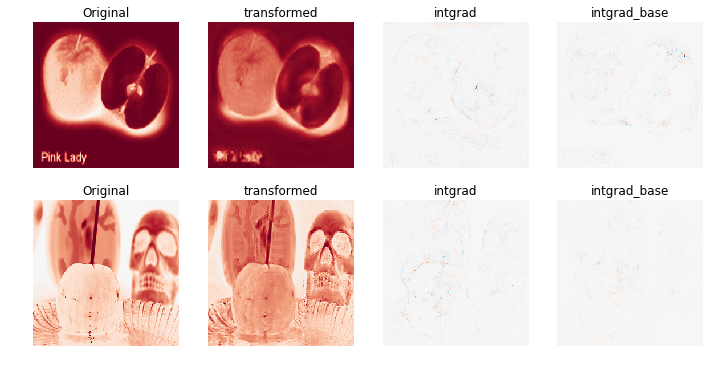

In [5]:
from utils import plot, plt

n_rows = len(file_name)
n_cols = len(explain_types)  + 2 # 6
xs = imag
attributions_ig = output["intgrad"]
attributions_ig_base_line = output["intgrad_base"]
# attributions_dl = output["deeplift"]
# attributions_dl_base_line = output["deeplift_base"]
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(3*n_cols, 3*n_rows))
for i in range(n_rows):
    a1 = attributions_ig[i]
    a2 = attributions_ig_base_line[i]
    # a3 = attributions_dl[i]
    # a4 = attributions_dl_base_line[i]
    plot(xs[i], axis=axes[i,0]).set_title('Original')
    plot(base_imag[i], axis=axes[i,1]).set_title('transformed')
    plot(a1, axis=axes[i,2]).set_title('intgrad')
    plot(a2, axis=axes[i,3]).set_title('intgrad_base')
    # plot(a3, axis=axes[i,4]).set_title('deeplift')
    # plot(a4, axis=axes[i, 5]).set_title('deeplift_base')

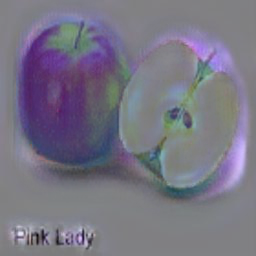

In [6]:
diff_image_base = imag - base_imag
new_diff_image_base = imag - new_base_imag
tf.keras.preprocessing.image.array_to_img(diff_image_base[0])

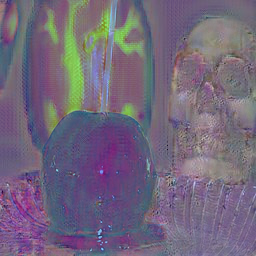

In [7]:
tf.keras.preprocessing.image.array_to_img(diff_image_base[1])

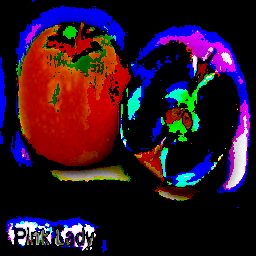

In [8]:
tf.keras.preprocessing.image.array_to_img(new_diff_image_base[0])

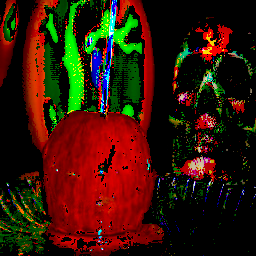

In [9]:
tf.keras.preprocessing.image.array_to_img(new_diff_image_base[1])